In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from random import choice, sample
from sklearn.pipeline import Pipeline
import itertools
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"E:\TCSION PROJECT\webmd.csv")

In [3]:
data.head()

Age      Condition       Date                          Drug  DrugId  \
0  75 or over    Stuffy Nose  9/21/2014                  25dph-7.5peh  146724   
1       25-34  Cold Symptoms  1/13/2011                  25dph-7.5peh  146724   
2       65-74          Other  7/16/2012  warfarin (bulk) 100 % powder  144731   
3  75 or over          Other  9/23/2010  warfarin (bulk) 100 % powder  144731   
4       35-44          Other   1/6/2009  warfarin (bulk) 100 % powder  144731   

   EaseofUse  Effectiveness  \
0          5              5   
1          5              5   
2          2              3   
3          2              2   
4          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   

                                               Sides  UsefulCount  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2                                                               0  
3                                                               0  
4                                                               1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
data.describe()

DrugId      EaseofUse  Effectiveness   Satisfaction  \
count  362806.000000  362806.000000  362806.000000  362806.000000   
mean    36879.370774       4.019829       3.532061       3.135408   
std     52624.412971       1.317711       1.455961       1.611106   
min         1.000000       1.000000       1.000000       1.000000   
25%      4896.000000       3.000000       3.000000       1.000000   
50%      9548.000000       5.000000       4.000000       3.000000   
75%     63522.000000       5.000000       5.000000       5.000000   
max    178546.000000      10.000000      10.000000      10.000000   

         UsefulCount  
count  362806.000000  
mean        6.744916  
std         9.324240  
min         0.000000  
25%         1.000000  
50%         4.000000  
75%         9.000000  
max       255.000000

In [7]:
data.shape

(362806, 12)

In [8]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [9]:
from mimesis import Generic
import random

In [10]:
generic = Generic()

In [11]:
# Create fake names and races for the dataset

In [12]:
num_samples = len(data)  # Assuming df is your existing dataset

In [13]:
    fake_names = [generic.person.full_name() for _ in range(num_samples)]
    fake_races = [random.choice(["Caucasian", "African American", "Asian", "Hispanic", "Other"]) for _ in range(num_samples)]

In [14]:
new_rows = pd.DataFrame({'Name': fake_names, 'Race': fake_races})
data1 = pd.concat([new_rows, data] ,axis=1).reindex(data.index)

In [15]:
num_samples = len(data1)

In [16]:
data1.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [17]:
#Add the "name" and "race" columns to your existing dataset:

In [18]:
data1.head()

Name              Race         Age      Condition       Date  \
0        Marlen Hurst             Asian  75 or over    Stuffy Nose  9/21/2014   
1  Frankie Richardson          Hispanic       25-34  Cold Symptoms  1/13/2011   
2     Merlene Sampson  African American       65-74          Other  7/16/2012   
3    Williams Ellison             Asian  75 or over          Other  9/23/2010   
4      Benedict Black          Hispanic       35-44          Other   1/6/2009   

                           Drug  DrugId  EaseofUse  Effectiveness  \
0                  25dph-7.5peh  146724          5              5   
1                  25dph-7.5peh  146724          5              5   
2  warfarin (bulk) 100 % powder  144731          2              3   
3  warfarin (bulk) 100 % powder  144731          2              2   
4  warfarin (bulk) 100 % powder  144731          1              1   

                                             Reviews  Satisfaction     Sex  \
0  I'm a retired physician and of all the meds I ...             5    Male   
1  cleared me right up even with my throat hurtin...             5  Female   
2  why did my PTINR go from a normal of 2.5 to ov...             3  Female   
3                       FALLING AND DON'T REALISE IT             1  Female   
4  My grandfather was prescribed this medication ...             1    Male   

                                               Sides  UsefulCount  
0  Drowsiness,  dizziness ,  dry mouth /nose/thro...            0  
1  Drowsiness,  dizziness ,  dry mouth /nose/thro...            1  
2                                                               0  
3                                                               0  
4                                                               1

# EDA and Preprocessing

In [19]:
#Let’s check the number of null values

In [20]:
data1 = data1[data1.DrugId == 6873]

In [21]:
data1.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [22]:
# Nan rows were dropped

In [23]:
data1.dropna(axis = 0, inplace = True)
data1.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [24]:
for i in data1.columns:
    data1[i] = data1[i].replace(" ", np.nan)# choose any one

In [25]:
data1.isna().sum()

Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1562
Satisfaction        0
Sex               494
Sides               0
UsefulCount         0
dtype: int64

In [26]:
data1.dropna(axis=0, inplace = True)
data1.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [27]:
# Handling instances with double whitespaces
for i in data1:
    data1[i]=np.where(data1[i]=="  ",np.NAN,data1[i])

In [28]:
data1.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# Verifying each column values

In [29]:
data1.Sex.value_counts()

Female    4060
Male      2466
Name: Sex, dtype: int64

In [30]:
data1.Age.value_counts()

55-64         1912
45-54         1760
65-74         1148
35-44          858
75 or over     490
25-34          306
19-24           44
13-18            6
0-2              2
Name: Age, dtype: int64

# Changing date to year moth and day of week

In [31]:
data1['Year'] = pd.to_datetime(data1['Date'], errors='coerce').dt.year
data1['Month'] = pd.to_datetime(data1['Date'], errors='coerce').dt.month
data1['day_of_week'] = pd.to_datetime(data1['Date'], errors='coerce').dt.day_name()

In [32]:
data1.head()

Name              Race         Age            Condition  \
9203      Lien Yates             Other  75 or over  High Blood Pressure   
9209   Vennie Joyner         Caucasian       55-64  High Blood Pressure   
9215    Casey French             Other       65-74  High Blood Pressure   
9221  Roselee Bonner         Caucasian       55-64  High Blood Pressure   
9227     Qiana James  African American       55-64  High Blood Pressure   

            Date                 Drug  DrugId  EaseofUse  Effectiveness  \
9203    2/8/2020  lisinopril solution  6873.0        5.0            4.0   
9209   1/14/2020  lisinopril solution  6873.0        4.0            5.0   
9215  10/17/2019  lisinopril solution  6873.0        5.0            5.0   
9221  10/13/2019  lisinopril solution  6873.0        2.0            4.0   
9227   8/16/2019  lisinopril solution  6873.0        3.0            1.0   

                                                Reviews  Satisfaction     Sex  \
9203  I have developed a very itch rash on my body f...           4.0  Female   
9209  tried alternative medicine Beet root, hibiscus...           4.0    Male   
9215  Have been taking 10 mg doses per day for over ...           5.0    Male   
9221  I don't like that I'm taking this and not know...           2.0    Male   
9227  Was on this medicine for about 2 months and ha...           1.0  Female   

                                                  Sides  UsefulCount  Year  \
9203  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  2020   
9209  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  2020   
9215  Dizziness ,  lightheadedness , tiredness, or  ...          6.0  2019   
9221  Dizziness ,  lightheadedness , tiredness, or  ...         12.0  2019   
9227  Dizziness ,  lightheadedness , tiredness, or  ...         22.0  2019   

      Month day_of_week  
9203      2    Saturday  
9209      1     Tuesday  
9215     10    Thursday  
9221     10      Sunday  
9227      8      Friday

In [33]:
data1.head(5)

Name              Race         Age            Condition  \
9203      Lien Yates             Other  75 or over  High Blood Pressure   
9209   Vennie Joyner         Caucasian       55-64  High Blood Pressure   
9215    Casey French             Other       65-74  High Blood Pressure   
9221  Roselee Bonner         Caucasian       55-64  High Blood Pressure   
9227     Qiana James  African American       55-64  High Blood Pressure   

            Date                 Drug  DrugId  EaseofUse  Effectiveness  \
9203    2/8/2020  lisinopril solution  6873.0        5.0            4.0   
9209   1/14/2020  lisinopril solution  6873.0        4.0            5.0   
9215  10/17/2019  lisinopril solution  6873.0        5.0            5.0   
9221  10/13/2019  lisinopril solution  6873.0        2.0            4.0   
9227   8/16/2019  lisinopril solution  6873.0        3.0            1.0   

                                                Reviews  Satisfaction     Sex  \
9203  I have developed a very itch rash on my body f...           4.0  Female   
9209  tried alternative medicine Beet root, hibiscus...           4.0    Male   
9215  Have been taking 10 mg doses per day for over ...           5.0    Male   
9221  I don't like that I'm taking this and not know...           2.0    Male   
9227  Was on this medicine for about 2 months and ha...           1.0  Female   

                                                  Sides  UsefulCount  Year  \
9203  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  2020   
9209  Dizziness ,  lightheadedness , tiredness, or  ...          3.0  2020   
9215  Dizziness ,  lightheadedness , tiredness, or  ...          6.0  2019   
9221  Dizziness ,  lightheadedness , tiredness, or  ...         12.0  2019   
9227  Dizziness ,  lightheadedness , tiredness, or  ...         22.0  2019   

      Month day_of_week  
9203      2    Saturday  
9209      1     Tuesday  
9215     10    Thursday  
9221     10      Sunday  
9227      8      Friday

In [34]:
#Useful Count

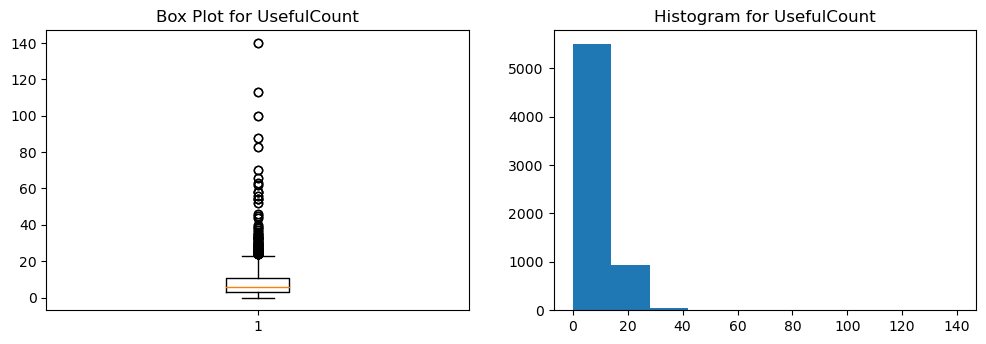

In [35]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.boxplot(data1["UsefulCount"])
plt.title("Box Plot for UsefulCount")
plt.subplot(2,2,2)
plt.hist(data1["UsefulCount"])
plt.title("Histogram for UsefulCount")
skewness = data1["UsefulCount"].skew()

In [36]:
skewness

5.09650737167029

In [37]:
# Assuming you want to transform 'ColumnName'

In [38]:
data_Usefulcount = pd.DataFrame(data1['UsefulCount'])

In [39]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

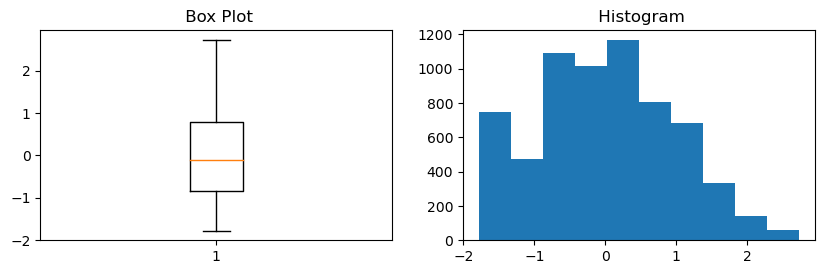

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")
plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")
data1['UsefulCount_boxcox'] = data_Usefulcount1
skewness = data1['UsefulCount_boxcox'].skew()

In [41]:
skewness

0.13539917023288633

Overall, this code snippet helps in preprocessing the 'UsefulCount' data, making it more suitable for further analysis. The transformation process and visualizations aid in understanding the effects of the Box-Cox transformation on the data distribution.

#EaseofUse

Skewness of Ease of Use: -1.0956719032464681


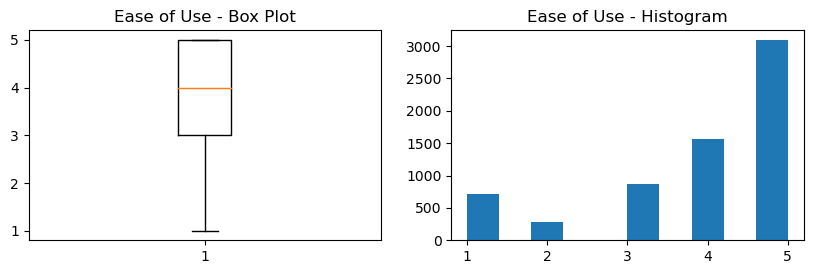

In [42]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(data1["EaseofUse"])
plt.title("Ease of Use - Box Plot")
plt.subplot(2,2,2)
plt.hist(data1["EaseofUse"])
plt.title("Ease of Use - Histogram")
ease_of_use_skewness = data1.EaseofUse.skew()
print(f"Skewness of Ease of Use: {ease_of_use_skewness}")

In [43]:
# Create scaler and power transformer
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
# Create a pipeline with scaler and power transformer
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
# Apply the pipeline to the 'EaseofUse' column
data_EaseofUse = pd.DataFrame(data1['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

Text(0.5, 1.0, 'Ease of Use (Box-Cox Transformed) - Histogram')

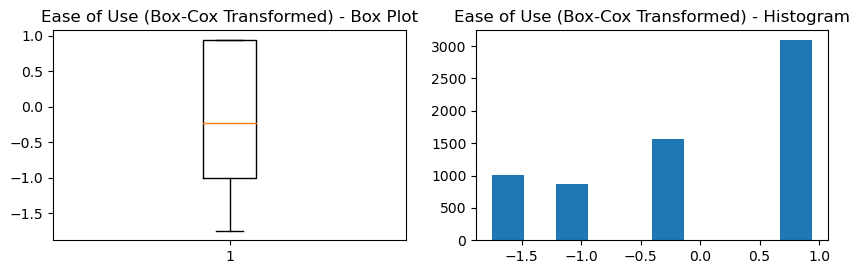

In [44]:
# Create subplots
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title("Ease of Use (Box-Cox Transformed) - Box Plot")
plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title("Ease of Use (Box-Cox Transformed) - Histogram")

In [45]:
# Add the transformed data back to data1
data1['EaseofUse_boxcox'] = data_EaseofUse1
# Calculate skewness
ease_of_use_boxcox_skewness = data1.EaseofUse_boxcox.skew()
print(f"Skewness of Ease of Use (Box-Cox Transformed): {ease_of_use_boxcox_skewness}")

Skewness of Ease of Use (Box-Cox Transformed): -0.4695297334699221


In [46]:
#Satisfaction column¶

Text(0.5, 1.0, 'Satisfaction - Histogram')

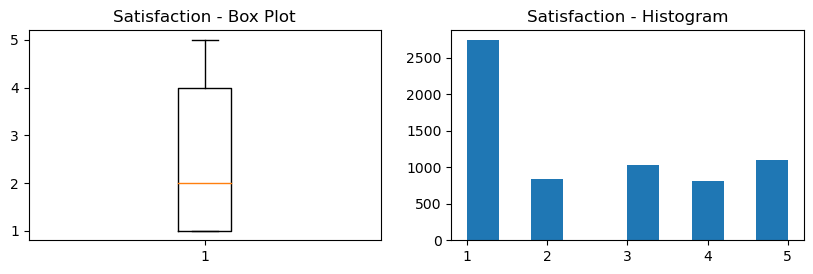

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(data1["Satisfaction"])
plt.title("Satisfaction - Box Plot")
plt.subplot(2,2,2)
plt.hist(data1["Satisfaction"])
plt.title("Satisfaction - Histogram")

In [48]:
satisfaction_skewness = data1.Satisfaction.skew()
print(f"Skewness of Satisfaction: {satisfaction_skewness}")

Skewness of Satisfaction: 0.46899147382396195


In [49]:
#Effectiveness

Text(0.5, 1.0, 'Effectiveness - Histogram')

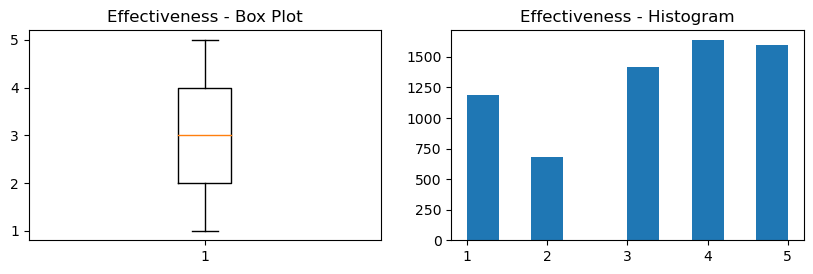

In [50]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data1["Effectiveness"])
plt.title("Effectiveness - Box Plot")

plt.subplot(2,2,2)
plt.hist(data1["Effectiveness"])
plt.title("Effectiveness - Histogram")

In [51]:
effectiveness_skewness = data1.Effectiveness.skew()
print(f"Skewness of Effectiveness: {effectiveness_skewness}")

Skewness of Effectiveness: -0.35269982353771245


After conducting an assessment of skewness and outliers, it was determined that the columns 'UsefulCount', 'EaseofUse', 'Effectiveness', and 'Satisfaction' required special processing.

# New Feature creation: Sideeffect¶

In [52]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data1['Sideeffect'] = data1['Satisfaction'].replace(mapping)

In [53]:
#  The bar chart using Plotly Express

In [54]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [55]:
import plotly.express as px

In [56]:
 # Create a DataFrame with the number of unique values for each column (excluding Reviews)

In [57]:
df = [[col, data[col].nunique()] for col in data.columns if col != 'Reviews']
uniques = pd.DataFrame(df, columns=["columns", "num of unique values"])

In [58]:
fig = px.bar(uniques, x='num of unique values', y='columns',
             orientation='h', text='num of unique values',
             labels={'columns': 'Columns', 'num of unique values': 'Num of Unique Values'},
             title='Unique Values')

In [59]:
fig.update_layout(
    title_font_family='Arial',
    title_font_size=18,
    title_font_color="#e6f3ff",
    plot_bgcolor='#11043a',
    paper_bgcolor='#11043a',
    font_color='white',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor='#333333',
    yaxis_gridcolor='#333333'
)


fig.show() 

In [60]:
#there are many Condition types, a closer look may be required to see the distribution of reviews for each
#there are more Drug than DrugId values, which suggests some kind of peculiarity in the way drugs are named
#the values of Satisfaction is supposed to be from 1 to 5. Some reviews may have wrong or missing values.
#Sex also has more values than what I am going to consider possible.

In [61]:
#The bar chart illustrates the distribution of reviews across different drugs. This can help identify popular or frequently reviewed drugs.

In [62]:
def pct(n, total):
    return round(n / total, 2) if total != 0 else 0

In [63]:
def missing_values_summary(df):
    nrows = df.shape[0]
    data = []

    for col in df.columns:
        if df[col].dtype.kind == "O":
            df[col] = df[col].str.strip()
            nulls = df[df[col] == ""][col].count()
            nulls += df[col].isnull().sum()
        elif df[col].dtype.kind == "i":
            nulls = df[col].isnull().sum()

        pctofnulls = pct(nulls, nrows)
        data.extend(
            [{"column": col, "pct": 1 - pctofnulls, "num of records": nrows - nulls, "type": "not missing"},
             {"column": col, "pct": pctofnulls, "num of records": nulls, "type": "missing"}])

    return pd.DataFrame(data)

In [64]:
# Generate the missing values summary

In [65]:
missing_summary = missing_values_summary(data1)

In [66]:
missing_summary = missing_summary[missing_summary['num of records'] != 0]

In [67]:
# Create a treemap to visualize the missing values summary

In [68]:
fig = px.treemap(missing_summary, path=['column', 'type'], values='num of records',
                 color='pct', color_continuous_scale='RdBu',
                 hover_data=['num of records', 'pct'])

In [69]:
fig.update_layout(title='Missing Values Summary',
                  xaxis=dict(title='Number of Records'),
                  yaxis=dict(title='Column'))
fig.show()

In [70]:
#the chart above reveals about 12% new missing values in Reviews, 7% in Sex and 3% in Age. Condition also has a few (0.01%) empty cells. I remove all the rows with missing values

Columns with High Missing Values:

Identify columns with large, dark rectangles. These represent columns with a high percentage of missing values. It's important to investigate and understand why these columns have a high number of missing values.

Columns with Low or No Missing Values:

Look for small, light-colored rectangles. These columns have a low percentage of missing values or none at all. These columns may contain crucial information for analysis.

Overall Completeness:

The large top-level rectangle represents the entire dataset. If it's mostly filled with color, it indicates a high percentage of missing values across the dataset.

In [71]:
columns_to_filter = ["Age", "Condition", "Sex", "Reviews"]

In [72]:
for col in columns_to_filter:
    data1 = data1[data1[col].notna() & (data1[col] != '')]

This code iterates over the specified columns and keeps only the rows where the values in those columns are not empty and not null.

# Top 20 Drugs based on No. of Users

In [73]:
# Get the top 20 drugs based on number of users

In [74]:
top_20_drugs = data["Drug"].value_counts().head(20).reset_index()
top_20_drugs.columns = ['Drug', 'Name']

In [75]:
# Create the bar plot

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_drugs, x='Drug', y='Name', palette='viridis')
plt.title("Top 20 Drugs based on No. of Users")
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Drug")
plt.ylabel("Name")
plt.show()

# Top 15 Conditions

In [77]:
data['Condition'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("Top 15 Conditions", fontsize=16)
plt.xlabel('Conditions', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Top 10 Drug Usage

In [78]:
# Get the counts of each drug

In [79]:
drug_counts = data['Drug'].value_counts()

In [80]:
# Select the top 10 drugs (for example)

In [81]:
top_10_drugs = drug_counts.nlargest(10)

In [82]:
# Create a pie chart

In [83]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_drugs, labels=top_10_drugs.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Drugs Usage')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

Dominant Drug Usage: The chart illustrates that a select few drugs dominate usage, with a notable proportion of users associated with these medications.

Cymbalta Leading the Usage: The drug "Cymbalta" stands out as the most frequently used among the top 10 drugs, capturing a substantial share of the user base.

Variety of Drugs: While "Cymbalta" holds a significant portion, there is still a diversity of drugs in use, indicating a range of medical conditions or treatment approaches.

Relatively Balanced Usage: Although "Cymbalta" leads in usage, the other drugs in the top 10 also have substantial user counts, suggesting a relatively balanced distribution among them.

Insights for Healthcare Providers: This information can be crucial for healthcare providers in understanding which drugs are most commonly prescribed or recommended for their patients.

Overall, the pie chart offers a visual summary of drug usage patterns, highlighting the dominant drugs while also acknowledging the diversity of medications being utilized. Further analysis could delve into specific characteristics or treatment strategies associated with these drugs.

# EDA on Licinopril

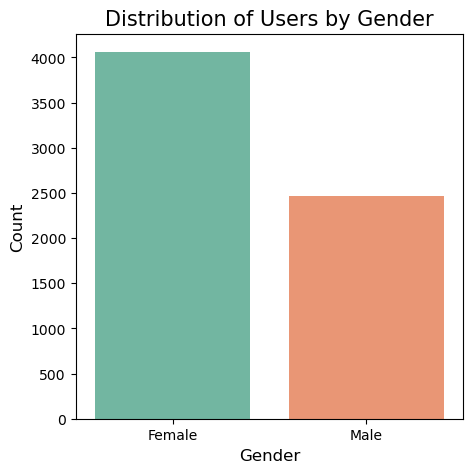

In [84]:
plt.figure(figsize=(5,5))
s = sns.countplot(x='Sex', data=data1, palette='Set2')
plt.title('Distribution of Users by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [85]:
#The majority of users are female.

# Distribution of users based on the "Age" and "Sex

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Sex', data=data1, palette='deep')
plt.title('Comparison of Users by Age and Sex', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sex')
plt.show()


In [87]:
#The chart provides a clear visual representation of user 
#Females represent a higher proportion of users across different age groups.

# Distribution of Users by Race and Gender

In [88]:
random_indices = np.random.randint(0, len(fake_races), len(data1))

In [89]:
data1['Race'] = [fake_races[i] for i in random_indices]

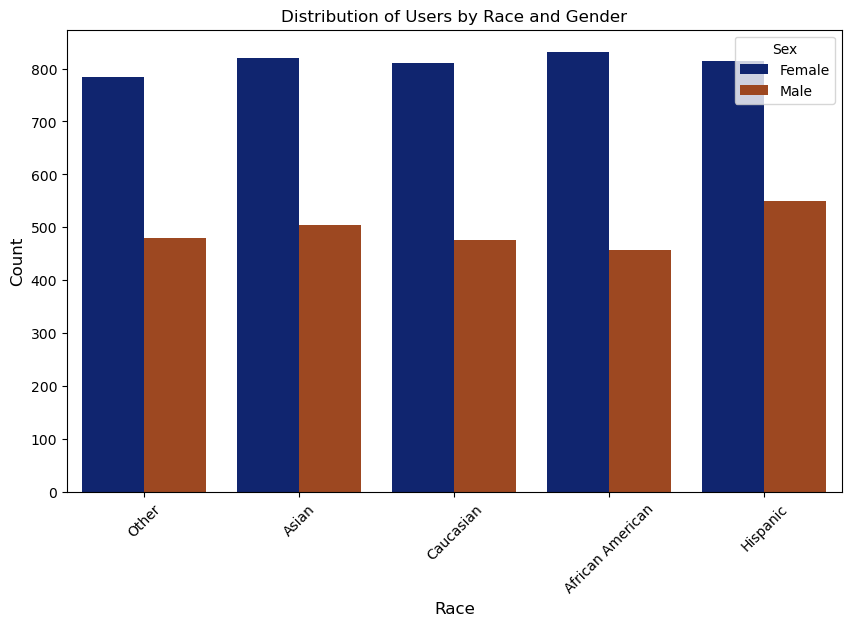

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', hue='Sex', data=data1, palette='dark')  
plt.title("Distribution of Users by Race and Gender", fontsize=12) 
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Distribution of Satisfaction Ratings

In [91]:
plt.figure(figsize=(8, 6))
plt.hist(data['Satisfaction'], bins=20, color='purple', alpha=0.7)
plt.title("Distribution of Satisfaction Ratings", fontsize=15)
plt.xlabel("Satisfaction", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [92]:
data1.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

The majority of users appear to rate their experiences highly, as indicated by the higher frequencies on the right side of the histogram. This suggests that a significant portion of users have positive sentiments towards the drugs they are reviewing

# Effectiveness of Drugs

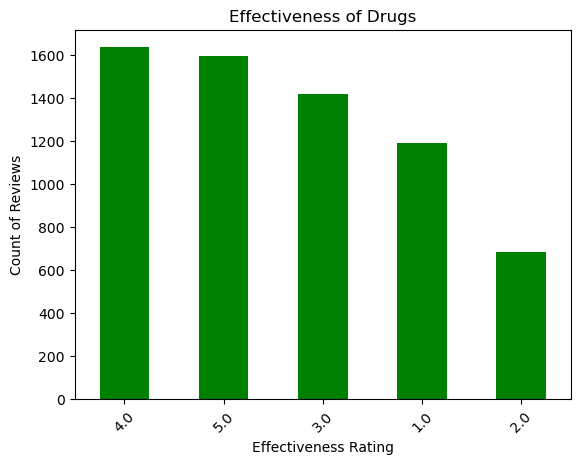

In [93]:
data1['Effectiveness'].value_counts().plot(kind='bar', color='green') 
plt.title("Effectiveness of Drugs", fontsize=12)  
plt.xlabel("Effectiveness Rating", fontsize=10)  
plt.ylabel("Count of Reviews", fontsize=10)  
plt.xticks(rotation=45)  
plt.show()

A substantial number of users, approximately 1600, have rated the drug as moderately effective, giving it a rating of 4.

# Distribution of Side Effects by year

In [94]:
data1['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue') 
plt.title("Distribution of Reviews by Year", fontsize=12)  
plt.xlabel("Year", fontsize=10)
plt.ylabel("Count of Reviews", fontsize=10)
plt.xticks(rotation=45)  
plt.show()

Over the years, there has been a consistent decline in user reviews.





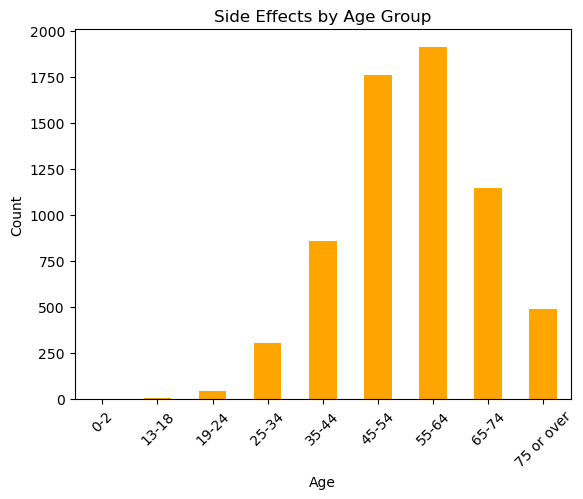

In [95]:
data1['Age'].value_counts().sort_index().plot(kind='bar', color='orange')  
plt.title("Side Effects by Age Group", fontsize=12)  
plt.xlabel("Age", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)  
plt.show()

The age group of 55-64 expressed that they experienced severe side effects, indicating a significant impact on their experience with the medication.

# Distribution of Side Effects

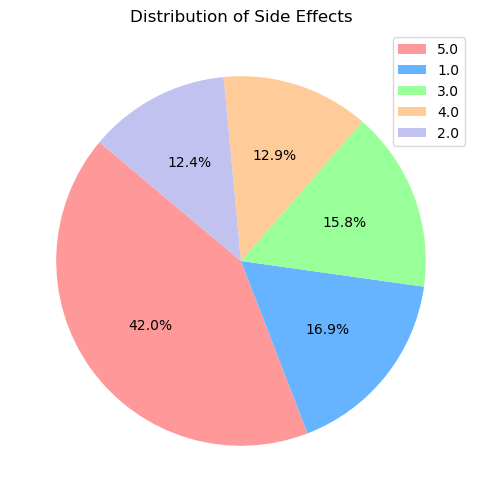

In [97]:
plt.figure(figsize=(6,6))
data1['Sideeffect'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Side Effects')
plt.ylabel('')
plt.legend(labels=data1['Sideeffect'].value_counts().index, loc='best')
plt.show()

"Extreme side effects were reported by 42% of users, with a rating of 1 indicating no side effects and 5 signifying extreme side effects."

# Distribution of Side Effects by Race

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', hue='Sideeffect', data=data1, palette='dark')
plt.title('Distribution of Side Effects by Race', fontsize=15)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

"White and Hispanic users have reported a higher incidence of extreme side effects."

# Analyzing and Preprocessing the Global Review Column

In [99]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
!pip install spacy

In [101]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 2.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [102]:
data1.Reviews.sample(5)

12087    Every time I take this medicine, my blood pres...
16977    In the morning i feel the difference when i th...
15242    Used 20mg once daily for two weeks, now have s...
16039    It has worked very well for me.I have been tak...
18193    slight discomfort on my right boob. comes and ...
Name: Reviews, dtype: object

In [103]:
import re
import string
from nltk.corpus import stopwords
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))

In [105]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [106]:
# Clean Reviews column
def clean_review(text):
    """Cleans up text"""
    
    def rep_emo(text, placeholder_pos=' happyemoticon ', placeholder_neg=' sademoticon '):
        """Replace emoticons"""
        emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D", ":-D", ":]", ":-]", ";)", ";-)",
                         ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
        emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                         ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]

        for e in emoticons_pos:
            text = text.replace(e, placeholder_pos)

        for e in emoticons_neg:
            text = text.replace(e, placeholder_neg)   
        return text

    def rep_punct(text):
        """Replace all punctuation with space"""
        for c in string.punctuation:
            text = text.replace(c, " ")
        return text

    def rem_stop_num(text):
        """Remove stop words and anything starting with number"""
        return " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())

    def lemmatize(text):
        """Return lemmas of tokens in text"""
        return " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")  

    return lemmatize(rem_stop_num(rep_punct(rep_emo(text))))

In [107]:
# Apply the clean_review function to the 'Reviews' column
data1['Reviews'] = data1['Reviews'].astype(str).apply(clean_review)

In [108]:
# Remove any rows with new empty strings following the clean-up
data1['Reviews'].replace("", np.nan, inplace=True)
data1.dropna(inplace=True)

In [109]:
# Adding indexes as "index" column for later use to recreate same splits 
data1.reset_index(inplace=True)

Cleaning up the review column. In order to identify positive and negative reviews for the algorithm, a new column called satisfaction1 is created. For satisfaction values of 3, >3, and ==3, respectively, 0 represents a negative review, 2 a positive review, and 1 a neutral review. We will not include the unbiased reviews.

In [110]:
# Create the Satisfaction1 column
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

data1["Satisfaction1"] = data1["Satisfaction"].apply(relabel)

# Train-Test Split

In [111]:
# Split the data
train_set, test_set = train_test_split(data1, test_size=0.25, random_state=0, stratify=data1["Satisfaction1"])

In [112]:
# Filter out neutral reviews
train_set = train_set[train_set["Satisfaction1"] != 1]
test_set = test_set[test_set["Satisfaction1"] != 1]

In [113]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"]).toarray()
X_test = vectorizer.transform(test_set["Reviews"]).toarray()
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

In [114]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [115]:
# Evaluate the model
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

In [116]:
print(f"Accuracy in train set: {acc_train:.2f}")
print(f"Accuracy in test set: {acc_test:.2f}")
print(classification_report(y_test, model.predict(X_test)))

Accuracy in train set: 0.99
Accuracy in test set: 0.93
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       894
           2       0.92      0.89      0.90       478

    accuracy                           0.93      1372
   macro avg       0.93      0.92      0.93      1372
weighted avg       0.93      0.93      0.93      1372



This code simplifies the TF-IDF vectorization (reducing the number of features to 1000) and uses a RandomForestClassifier with default settings for simplicity and speed. 

we got 93% accuracy

Let us the clean the review specific to our drug

In [117]:
batch_size = 100  
num_batches = len(data1) // batch_size

In [118]:
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    data1.loc[start_idx:end_idx, "Reviews"] = data1.loc[start_idx:end_idx, "Reviews"].apply(clean_review)

Let us the rank the reviews by creating a function for the same

In [119]:
def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    if (p == 0):
        return 0
    else :
        return 1

def predict_rank1(rank):
    if (rank < 3):
        return 0
    else:
        return 1

In [120]:
data1['Reviews_Rank'] = data1['Satisfaction']
data1.loc[data1['Satisfaction'] < 3, 'Reviews_Rank'] = data1.loc[data1['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
data1.loc[data1['Satisfaction'] > 3, 'Reviews_Rank'] = data1.loc[data1['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
data1.loc[data1['Satisfaction'] == 3, 'Reviews_Rank'] = data1.loc[data1['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)

In [121]:
#  Check unique values in 'Reviews_Rank' column
unique_ranks = data1['Reviews_Rank'].unique()
print(unique_ranks)

[1. 0.]


The unique-valued columns, namely 'Drug', 'DrugId', 'Condition', 'Date', 'Easeofuse', 'Usefulcount', 'Sides', and 'Year', will be dropped. The categorical features 'Race', 'Sex', 'Year', 'Month', and 'Dayofweek' will be encoded using one-hot encoding. Additionally, the 'Satisfaction' ratings will be categorized as follows: 'Nil' for a rating of 5, 'Mild' for 4, 'Moderate' for 3, 'Severe' for 2, and 'Extreme' for 1. This categorization assumes that patient satisfaction is influenced by the experienced side effects.






In [122]:
data1.drop(['Name', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse', 'Sides', 'UsefulCount'], axis=1, inplace=True)

In [123]:
data1['Month'] = data1['Month'].astype(str)
data1['Year'] = data1['Year'].astype(str)

data_encoded = data1[['Race', 'Age', 'Sex', 'Month', 'day_of_week']]
data_numeric = data1[['Effectiveness']]

In [124]:
data1.columns

Index(['index', 'Race', 'Age', 'Effectiveness', 'Reviews', 'Satisfaction',
       'Sex', 'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect', 'Satisfaction1', 'Reviews_Rank'],
      dtype='object')

# Encoding : One Hot Encoding

In [125]:
data_encoded = pd.get_dummies(data_encoded)
data_encoded

Race_African American  Race_Asian  Race_Caucasian  Race_Hispanic  \
0                         0           0               0              0   
1                         0           1               0              0   
2                         0           0               1              0   
3                         0           1               0              0   
4                         0           1               0              0   
...                     ...         ...             ...            ...   
6515                      0           0               0              1   
6516                      1           0               0              0   
6517                      0           0               0              0   
6518                      0           1               0              0   
6519                      0           0               1              0   

      Race_Other  Age_0-2  Age_13-18  Age_19-24  Age_25-34  Age_35-44  ...  \
0              1        0          0          0          0          0  ...   
1              0        0          0          0          0          0  ...   
2              0        0          0          0          0          0  ...   
3              0        0          0          0          0          0  ...   
4              0        0          0          0          0          0  ...   
...          ...      ...        ...        ...        ...        ...  ...   
6515           0        0          0          0          1          0  ...   
6516           0        0          0          0          0          0  ...   
6517           1        0          0          0          0          0  ...   
6518           0        0          0          0          1          0  ...   
6519           0        0          0          0          0          0  ...   

      Month_7  Month_8  Month_9  day_of_week_Friday  day_of_week_Monday  \
0           0        0        0                   0                   0   
1           0        0        0                   0                   0   
2           0        0        0                   0                   0   
3           0        0        0                   0                   0   
4           0        1        0                   1                   0   
...       ...      ...      ...                 ...                 ...   
6515        0        0        0                   0                   0   
6516        0        0        0                   0                   0   
6517        0        0        0                   1                   0   
6518        0        0        0                   1                   0   
6519        0        0        0                   0                   1   

      day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                        1                   0                     0   
1                        0                   0                     0   
2                        0                   0                     1   
3                        0                   1                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
6515                     0                   1                     0   
6516                     1                   0                     0   
6517                     0                   0                     0   
6518                     0                   0                     0   
6519                     0                   0                     0   

      day_of_week_Tuesday  day_of_week_Wednesday  
0                       0                      0  
1                       1                      0  
2                       0                      0  
3                       0                      0  
4                       0                      0  
...                   ...                    ...  
6515                    0                      0  
6516  

# Standard Scaling

In [126]:
# Assuming 'Effectiveness' is the column to be standardized
scaler = StandardScaler()
data_numeric = scaler.fit_transform(data_numeric)
data_numeric = pd.DataFrame(data_numeric, columns=['Effectiveness'])

In [127]:
data_numeric

Effectiveness
0          0.516698
1          1.225337
2          1.225337
3          0.516698
4         -1.609220
...             ...
6515      -1.609220
6516      -1.609220
6517       1.225337
6518      -1.609220
6519      -1.609220

[6520 rows x 1 columns]

In [128]:
data2 = data_encoded.copy()  # Making a copy of data_encod
data2['Effectiveness'] = data_numeric['Effectiveness'].values

In [129]:
data2

Race_African American  Race_Asian  Race_Caucasian  Race_Hispanic  \
0                         0           0               0              0   
1                         0           1               0              0   
2                         0           0               1              0   
3                         0           1               0              0   
4                         0           1               0              0   
...                     ...         ...             ...            ...   
6515                      0           0               0              1   
6516                      1           0               0              0   
6517                      0           0               0              0   
6518                      0           1               0              0   
6519                      0           0               1              0   

      Race_Other  Age_0-2  Age_13-18  Age_19-24  Age_25-34  Age_35-44  ...  \
0              1        0          0          0          0          0  ...   
1              0        0          0          0          0          0  ...   
2              0        0          0          0          0          0  ...   
3              0        0          0          0          0          0  ...   
4              0        0          0          0          0          0  ...   
...          ...      ...        ...        ...        ...        ...  ...   
6515           0        0          0          0          1          0  ...   
6516           0        0          0          0          0          0  ...   
6517           1        0          0          0          0          0  ...   
6518           0        0          0          0          1          0  ...   
6519           0        0          0          0          0          0  ...   

      Month_8  Month_9  day_of_week_Friday  day_of_week_Monday  \
0           0        0                   0                   0   
1           0        0                   0                   0   
2           0        0                   0                   0   
3           0        0                   0                   0   
4           1        0                   1                   0   
...       ...      ...                 ...                 ...   
6515        0        0                   0                   0   
6516        0        0                   0                   0   
6517        0        0                   1                   0   
6518        0        0                   1                   0   
6519        0        0                   0                   1   

      day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                        1                   0                     0   
1                        0                   0                     0   
2                        0                   0                     1   
3                        0                   1                     0   
4                        0                   0                     0   
...                    ...                 ...                   ...   
6515                     0                   1                     0   
6516                     1                   0                     0   
6517                     0                   0                     0   
6518                     0                   0                     0   
6519                     0                   0                     0   

      day_of_week_Tuesday  day_of_week_Wednesday  Effectiveness  
0                       0                      0       0.516698  
1                       1                      0       1.225337  
2                       0                      0       1.225337  
3                       0                      0       0.516698  
4                       0                      0      -1.609220  
...                   ...                    ...            ...  
6515                    0                      0      -1.609

Therefore, I believe that the following features—race, age, review rating, and effectiveness—may be combined to create a dataset that can be used to forecast a user's side effects.

In [130]:
data2 = data_encoded.copy()
data2['Effectiveness'] = data_numeric['Effectiveness'].values
data2['Reviews_Rank'] = data1['Reviews_Rank'].values
data2['UsefulCount_boxcox'] = data_Usefulcount1[:6520]  
data2['EaseofUse_boxcox'] = data_EaseofUse1[:6520]  

In [131]:
data2

Race_African American  Race_Asian  Race_Caucasian  Race_Hispanic  \
0                         0           0               0              0   
1                         0           1               0              0   
2                         0           0               1              0   
3                         0           1               0              0   
4                         0           1               0              0   
...                     ...         ...             ...            ...   
6515                      0           0               0              1   
6516                      1           0               0              0   
6517                      0           0               0              0   
6518                      0           1               0              0   
6519                      0           0               1              0   

      Race_Other  Age_0-2  Age_13-18  Age_19-24  Age_25-34  Age_35-44  ...  \
0              1        0          0          0          0          0  ...   
1              0        0          0          0          0          0  ...   
2              0        0          0          0          0          0  ...   
3              0        0          0          0          0          0  ...   
4              0        0          0          0          0          0  ...   
...          ...      ...        ...        ...        ...        ...  ...   
6515           0        0          0          0          1          0  ...   
6516           0        0          0          0          0          0  ...   
6517           1        0          0          0          0          0  ...   
6518           0        0          0          0          1          0  ...   
6519           0        0          0          0          0          0  ...   

      day_of_week_Monday  day_of_week_Saturday  day_of_week_Sunday  \
0                      0                     1                   0   
1                      0                     0                   0   
2                      0                     0                   0   
3                      0                     0                   1   
4                      0                     0                   0   
...                  ...                   ...                 ...   
6515                   0                     0                   1   
6516                   0                     1                   0   
6517                   0                     0                   0   
6518                   0                     0                   0   
6519                   1                     0                   0   

      day_of_week_Thursday  day_of_week_Tuesday  day_of_week_Wednesday  \
0                        0                    0                      0   
1                        0                    1                      0   
2                        1                    0                      0   
3                        0                    0                      0   
4                        0                    0                      0   
...                    ...                  ...                    ...   
6515                     0                    0                      0   
6516                     0                    0                      0   
6517                     0                    0                      0   
6518                     0                    0                      0   
6519                     0                    0                      0   

      Effectiveness  Reviews_Rank  UsefulCount_boxcox  EaseofUse_boxcox  
0          0.516698           1.0           -0.835439          0.943255  
1          1.225337           1.0           -0.835439         -0.231105  
2          1.225337           1.0           -0.102133          0.943255  
3          0.516698           0.0            0.918562         -1.480793  
4         -1.609220           0.0            1.837785         -1.004962  
...   

# From our final dataset, data2

In [132]:
data3 = pd.DataFrame(data1['Sideeffect'])

In [133]:
data3

Sideeffect
0            2.0
1            2.0
2            1.0
3            4.0
4            5.0
...          ...
6515         5.0
6516         5.0
6517         2.0
6518         5.0
6519         5.0

[6520 rows x 1 columns]

Targets for data3

In [134]:
y = data['Effectiveness']
x = data2.drop(['Effectiveness'], axis=1)
x1 = x.copy()
x2 = x.copy()

In [135]:
# Assuming 'Effectiveness' is your target column
ycp = data['Effectiveness']
xcp = data2.drop(['Effectiveness'], axis=1)

# Log Regression

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [137]:
# Split data into train and test sets with stratification
X_train, X_test, Y_train, Y_test = train_test_split(data2, data3, test_size=0.25, random_state=42, stratify=data3)
xcp_train, xcp_test, ycp_train, ycp_test = train_test_split(data2, data3, test_size=0.1, random_state=42)

In [138]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)  # Adjusted solver and max_iter
model_log_reg = log_reg.fit(X_train, Y_train)
Y_pred_log_reg = model_log_reg.predict(X_test)

In [139]:
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(Y_test, Y_pred_log_reg)
accuracy = accuracy_score(Y_test, Y_pred_log_reg)

In [140]:
# Print metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[237  36   3   0   0]
 [ 48 139  15   0   0]
 [  9  50  61  12 126]
 [  0   0  25  18 167]
 [  0   0  32  29 623]]

Accuracy Score: 0.6613496932515337


In [141]:
# Classification Report

In [142]:
report = classification_report(Y_test, Y_pred_log_reg)

In [143]:
# Print Classification Report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.86      0.83       276
         2.0       0.62      0.69      0.65       202
         3.0       0.45      0.24      0.31       258
         4.0       0.31      0.09      0.13       210
         5.0       0.68      0.91      0.78       684

    accuracy                           0.66      1630
   macro avg       0.57      0.56      0.54      1630
weighted avg       0.61      0.66      0.61      1630



# SVM Polynomial

In [144]:
from sklearn.svm import SVC

In [145]:
svm_clf_p = SVC(kernel='poly', degree=4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)

In [146]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred_svmp)
print(conf_matrix)

[[224  46   6   0   0]
 [ 39 147  16   0   0]
 [  9  33  77   5 134]
 [  0   0  20  13 177]
 [  0   0  20  20 644]]


In [147]:
# Accuracy Score
acc_score = accuracy_score(Y_test, y_pred_svmp)
print(acc_score)

0.6779141104294478


In [148]:
# Classification Report
report = classification_report(Y_test, y_pred_svmp)
print(report)

              precision    recall  f1-score   support

         1.0       0.82      0.81      0.82       276
         2.0       0.65      0.73      0.69       202
         3.0       0.55      0.30      0.39       258
         4.0       0.34      0.06      0.10       210
         5.0       0.67      0.94      0.79       684

    accuracy                           0.68      1630
   macro avg       0.61      0.57      0.56      1630
weighted avg       0.63      0.68      0.63      1630



# SVM RBF

In [149]:
# Define and train the SVM RBF model
svm_clf_r = SVC(kernel='rbf', probability=True)  
svm_model = svm_clf_r.fit(X_train, Y_train)

In [150]:
# Predict using the trained model
y_pred_svmr = svm_clf_r.predict(X_test)

In [151]:
# Confusion Matrix
conf_matrix_svmr = confusion_matrix(Y_test, y_pred_svmr)
print("Confusion Matrix:")
print(conf_matrix_svmr)

Confusion Matrix:
[[235  37   4   0   0]
 [ 38 148  16   0   0]
 [  9  33  58   5 153]
 [  0   0   8   3 199]
 [  0   0   5   1 678]]


In [152]:
# Accuracy Score
acc_score_svmr = accuracy_score(Y_test, y_pred_svmr)
print(f"\nAccuracy Score: {acc_score_svmr}")


Accuracy Score: 0.6883435582822086


In [153]:
# Classification Report
report_svmr = classification_report(Y_test, y_pred_svmr)
print("\nClassification Report:")
print(report_svmr)


Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.85      0.84       276
         2.0       0.68      0.73      0.70       202
         3.0       0.64      0.22      0.33       258
         4.0       0.33      0.01      0.03       210
         5.0       0.66      0.99      0.79       684

    accuracy                           0.69      1630
   macro avg       0.63      0.56      0.54      1630
weighted avg       0.65      0.69      0.62      1630



# kNN

In [154]:
# Define a range of k values to experiment with
k_values = np.arange(3, 16)

In [155]:
# Create an empty list to store accuracy metrics
accuracy_scores = []

In [156]:
for k in k_values:
    # Initialize KNN classifier with k neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [157]:
# Train the model
knn_model = knn_classifier.fit(X_train, Y_train)

In [158]:
# Predict using the model
y_pred_knn = knn_model.predict(X_test)

In [159]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_knn)

In [160]:
# Append accuracy to the list
accuracy_scores.append(accuracy)

In [161]:
accuracy_scores = np.array(accuracy_scores)

In [162]:
# Create a 2D array for heatmap
heatmap_data = accuracy_scores.reshape(1, -1)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, xticklabels=k_values, yticklabels=False)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Heatmap vs. Number of Neighbors (k)')
plt.show()

This heatmap will make it easier to identify the optimal k value for your k-Nearest Neighbors model based on the highest accuracy.

In [163]:
# Define the number of neighbors
n_neighbors = 11

In [164]:
# Create and train the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
model = knn.fit(X_train, Y_train)

In [165]:
# Make predictions
Y_pred = model.predict(X_test)

In [166]:
# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[230  32   9   0   5]
 [ 98  84  13   1   6]
 [ 31  42  52  29 104]
 [  7   1  35  38 129]
 [ 10   1  44  54 575]]


In [167]:
# Calculate and print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


In [168]:
# Generate and print the classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.61      0.83      0.71       276
         2.0       0.53      0.42      0.46       202
         3.0       0.34      0.20      0.25       258
         4.0       0.31      0.18      0.23       210
         5.0       0.70      0.84      0.77       684

    accuracy                           0.60      1630
   macro avg       0.50      0.49      0.48      1630
weighted avg       0.56      0.60      0.57      1630



# Decision Tree

In [169]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [170]:
# Calculate and print the metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
classification_report_dt = classification_report(Y_test, y_pred_dt)

In [171]:
print("Decision Tree Classification Results:")
print("Confusion Matrix:")
print(confusion_matrix_dt)
print("Accuracy Score:", accuracy_dt)
print("Classification Report:")
print(classification_report_dt)

Decision Tree Classification Results:
Confusion Matrix:
[[212  52  12   0   0]
 [ 53 127  22   0   0]
 [ 19  24 117  39  59]
 [  0   0  34  92  84]
 [  0   0  54 117 513]]
Accuracy Score: 0.650920245398773
Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.77      0.76       276
         2.0       0.63      0.63      0.63       202
         3.0       0.49      0.45      0.47       258
         4.0       0.37      0.44      0.40       210
         5.0       0.78      0.75      0.77       684

    accuracy                           0.65      1630
   macro avg       0.60      0.61      0.60      1630
weighted avg       0.66      0.65      0.65      1630



# Random forest

In [172]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state=42)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)

In [173]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(Y_test, y_pred_rfm)
accuracy = accuracy_score(Y_test, y_pred_rfm)
class_report = classification_report(Y_test, y_pred_rfm)

In [174]:
# Printing the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[238  34   4   0   0]
 [ 46 148   8   0   0]
 [ 13  30  99  19  97]
 [  0   0  20  60 130]
 [  0   0  11  27 646]]
Accuracy: 0.7306748466257669
Classification Report:
               precision    recall  f1-score   support

         1.0       0.80      0.86      0.83       276
         2.0       0.70      0.73      0.71       202
         3.0       0.70      0.38      0.49       258
         4.0       0.57      0.29      0.38       210
         5.0       0.74      0.94      0.83       684

    accuracy                           0.73      1630
   macro avg       0.70      0.64      0.65      1630
weighted avg       0.72      0.73      0.70      1630



# Gradient Boosting Classifier

In [175]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, Y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [176]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_gradient_boosting)
print("Accuracy:", accuracy)

Accuracy: 0.694478527607362


In [177]:
# Generate confusion matrix
confusion_mat = confusion_matrix(Y_test, y_pred_gradient_boosting)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[234  37   5   0   0]
 [ 37 146  19   0   0]
 [  9  23  87  18 121]
 [  0   0  13  23 174]
 [  0   0  15  27 642]]


# Fine tuning of parametres

In [178]:
# Fine-tuning the Random Forest Classifier
randfine = RandomForestClassifier(max_depth=100, n_estimators=100)
randfine.fit(X_train, Y_train)
Y_randfine = randfine.predict(X_test)

In [179]:
# Assessing the performance
accuracy = accuracy_score(Y_test, Y_randfine)
conf_matrix = confusion_matrix(Y_test, Y_randfine)

In [180]:
print("Accuracy is:", accuracy)
print("Confusion matrix:\n", conf_matrix)

Accuracy is: 0.7245398773006135
Confusion matrix:
 [[241  31   4   0   0]
 [ 46 144  12   0   0]
 [ 10  29 109  16  94]
 [  0   0  17  56 137]
 [  0   0  14  39 631]]


# Bernoulli Naive Bayes

In [181]:
# Using Bernoulli Naive Bayes Classifier
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
y_pred_bnb = bnb.predict(X_test)

In [182]:
# Assessing the performance
accuracy = accuracy_score(Y_test, y_pred_bnb)
conf_matrix = confusion_matrix(Y_test, y_pred_bnb)

In [183]:
print("Accuracy is:", accuracy)
print("Confusion matrix:\n", conf_matrix)

Accuracy is: 0.6202453987730061
Confusion matrix:
 [[216  55   5   0   0]
 [129  54  19   0   0]
 [ 16  23  70   4 145]
 [  0   0  16   9 185]
 [  0   0  15   7 662]]


# Normalization

In [184]:
# Initialize the Normalizer
normalizer = Normalizer()

In [185]:
# Apply normalization to the features
x1 = normalizer.fit_transform(data2)

In [186]:
# Split the data into training and testing sets
x1_train, x1_test, y_train, y_test = train_test_split(data2, data3, test_size=0.1, random_state=42)

# Log Regression

In [187]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x1_train, y_train)

LogisticRegression()

In [188]:
# Make predictions
y_logistic = logistic_model.predict(x1_test)

In [189]:
# Generate and print classification report
report = classification_report(y_test, y_logistic)
accuracy = accuracy_score(Y_test, Y_pred_log_reg)
print("Classification Report:\n", report)
print("Accuracy:\n", accuracy)

Classification Report:
               precision    recall  f1-score   support

         1.0       0.85      0.83      0.84       114
         2.0       0.65      0.74      0.69        77
         3.0       0.42      0.24      0.31       103
         4.0       0.22      0.06      0.10        93
         5.0       0.63      0.86      0.73       265

    accuracy                           0.63       652
   macro avg       0.55      0.55      0.53       652
weighted avg       0.58      0.63      0.59       652

Accuracy:
 0.6613496932515337


In [190]:
# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_logistic)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 95  18   1   0   0]
 [ 13  57   7   0   0]
 [  4  13  25   3  58]
 [  0   0   8   6  79]
 [  0   0  18  18 229]]


# KNN

In [191]:
# Define the K-Nearest Neighbors Classifier
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [192]:
# Train the classifier using the normalized data
classifier1.fit(x1_train, y_train)

KNeighborsClassifier()

In [193]:
# Predict the target values
y_pred2 = classifier1.predict(x1_test)
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred2)

In [194]:
# Print the accuracy
print("Accuracy is", acc)

Accuracy is 0.553680981595092


In [195]:
# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[ 88  17   4   2   3]
 [ 36  27   9   1   4]
 [ 14  12  30  15  32]
 [  9   2  16  19  47]
 [  7   4  21  36 197]]


# Decision Tree

In [196]:
# Initialize and train the Decision Tree Classifier
decision1 = DecisionTreeClassifier()
decision1.fit(x1_train, y_train)

DecisionTreeClassifier()

In [197]:
# Predict using the trained model
y_decision2 = decision1.predict(x1_test)
# Calculate accuracy
acc = accuracy_score(y_test, y_decision2)
print("Accuracy is", acc)
# Generate classification report
class_report = classification_report(y_test, y_decision2)

Accuracy is 0.6104294478527608


In [198]:
# Confusion Matrix
conf_matrix_decision = confusion_matrix(y_test, y_decision2)
print("Confusion Matrix:")
print(conf_matrix_decision)
# Print the classification report
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 88  22   4   0   0]
 [ 20  48   9   0   0]
 [  7   9  42  15  30]
 [  0   0  14  30  49]
 [  0   0  32  43 190]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.77      0.77       114
         2.0       0.61      0.62      0.62        77
         3.0       0.42      0.41      0.41       103
         4.0       0.34      0.32      0.33        93
         5.0       0.71      0.72      0.71       265

    accuracy                           0.61       652
   macro avg       0.57      0.57      0.57       652
weighted avg       0.61      0.61      0.61       652



# SVM Polynomial

In [199]:
# Initialize the SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  

In [200]:
# Train the model
svm_poly.fit(x1_train, y_train)
# Predict on the test set
y_pred_poly = svm_poly.predict(x1_test)

In [201]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_poly)
print("Accuracy:", accuracy)

Accuracy: 0.6641104294478528


In [202]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_poly)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 95  17   2   0   0]
 [ 13  58   6   0   0]
 [  4   9  30   5  55]
 [  0   0   6   4  83]
 [  0   0  11   8 246]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84       114
         2.0       0.69      0.75      0.72        77
         3.0       0.55      0.29      0.38       103
         4.0       0.24      0.04      0.07        93
         5.0       0.64      0.93      0.76       265

    accuracy                           0.66       652
   macro avg       0.59      0.57      0.55       652
weighted avg       0.61      0.66      0.61       652



# SVM RBF

In [203]:
# Initialize the SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf')

In [204]:
# Train the model
svm_rbf.fit(x1_train, y_train)
# Predict on the test set
y_pred_rbf = svm_rbf.predict(x1_test)

In [205]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)

Accuracy: 0.6656441717791411


In [206]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_rbf)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[ 95  18   1   0   0]
 [ 13  57   7   0   0]
 [  4   9  24   2  64]
 [  0   0   3   0  90]
 [  0   0   6   1 258]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84       114
         2.0       0.68      0.74      0.71        77
         3.0       0.59      0.23      0.33       103
         4.0       0.00      0.00      0.00        93
         5.0       0.63      0.97      0.76       265

    accuracy                           0.67       652
   macro avg       0.55      0.56      0.53       652
weighted avg       0.58      0.67      0.59       652



# Random forest

In [207]:
# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [208]:
# Fit the model to the training data
rf_classifier.fit(x1_train, y_train)
# Predict on the test set
y_pred_rf = rf_classifier.predict(x1_test)

In [209]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_rf)
confusion_mat = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

In [210]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7147239263803681
Confusion Matrix:
[[ 98  15   1   0   0]
 [ 14  54   9   0   0]
 [  4   8  45  10  36]
 [  0   0   6  24  63]
 [  0   0   7  13 245]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.84      0.86      0.85       114
         2.0       0.70      0.70      0.70        77
         3.0       0.66      0.44      0.53       103
         4.0       0.51      0.26      0.34        93
         5.0       0.71      0.92      0.80       265

    accuracy                           0.71       652
   macro avg       0.69      0.64      0.65       652
weighted avg       0.70      0.71      0.69       652



# Gradient Boosting Classifier

In [211]:
# Create an instance of the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

In [212]:
# Fit the model to the training data
gb_classifier.fit(x1_train, y_train)
# Predict on the test set
y_pred_gb = gb_classifier.predict(x1_test)

In [213]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_gb)
confusion_mat = confusion_matrix(y_test, y_pred_gb)
classification_rep = classification_report(y_test, y_pred_gb)

In [214]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.661042944785276
Confusion Matrix:
[[ 93  20   1   0   0]
 [ 13  56   8   0   0]
 [  4   7  31   8  53]
 [  0   0   7   5  81]
 [  0   0  11   8 246]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.85      0.82      0.83       114
         2.0       0.67      0.73      0.70        77
         3.0       0.53      0.30      0.39       103
         4.0       0.24      0.05      0.09        93
         5.0       0.65      0.93      0.76       265

    accuracy                           0.66       652
   macro avg       0.59      0.57      0.55       652
weighted avg       0.61      0.66      0.61       652



# Fine tuning parameter

In [215]:
randfine2=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine2.fit(x1_train,y_train)
y_randfine2=randfine2.predict(x1_test)

In [216]:
# Assessing the performance
accuracy = accuracy_score(Y_test, Y_randfine)
conf_matrix = confusion_matrix(Y_test, Y_randfine)

In [217]:
print("Accuracy is:", accuracy)
print("Confusion matrix:\n", conf_matrix)

Accuracy is: 0.7245398773006135
Confusion matrix:
 [[241  31   4   0   0]
 [ 46 144  12   0   0]
 [ 10  29 109  16  94]
 [  0   0  17  56 137]
 [  0   0  14  39 631]]


# Bernoulli Naive Bayes

In [218]:
# Initialize the Bernoulli Naive Bayes Classifier
bnb_classifier = BernoulliNB()
# Train the classifier on the training data
bnb_classifier.fit(xcp_train, ycp_train)
# Predict using the trained classifier
y_bnb_pred = bnb_classifier.predict(xcp_test)

In [219]:
# Evaluate the model
accuracy = accuracy_score(ycp_test, y_bnb_pred)
print("Accuracy:", accuracy)

Accuracy: 0.602760736196319


In [220]:
# Print the confusion matrix
conf_matrix = confusion_matrix(ycp_test, y_bnb_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Generate a classification report
classification_rep = classification_report(ycp_test, y_bnb_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[ 91  22   1   0   0]
 [ 49  20   8   0   0]
 [  8   4  27   1  63]
 [  0   0   9   3  81]
 [  0   0   8   5 252]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.61      0.80      0.69       114
         2.0       0.43      0.26      0.33        77
         3.0       0.51      0.26      0.35       103
         4.0       0.33      0.03      0.06        93
         5.0       0.64      0.95      0.76       265

    accuracy                           0.60       652
   macro avg       0.51      0.46      0.44       652
weighted avg       0.55      0.60      0.53       652



"After applying normalization techniques, we achieved an accuracy of 73% with the Random Forest model. This indicates that the Random Forest algorithm is well-suited for our dataset and demonstrates a higher predictive capability compared to alternative models. Therefore, we have chosen to proceed with the Random Forest model for further optimization and deployment in our project."